<a href="https://colab.research.google.com/github/Lanlanb/Final-Projects-Kelas.work/blob/main/Case03_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'anime-recommendations-database:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F571%2F1094%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241005%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241005T142446Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35cfdb9fa5d00a3bea39ffb367b3962f875f2bfba1bdfd2e535d63ceee844c836919618257367d9043d1f23ed63581131c79e959d506c029268ff621fc4b1b9fb42092f40d27ecf73fd8255502b90dbdb29406a8be02b262623c8d2ff72e68f4de8492782adb090d0ce24c541f26bc1df813b4013535d5f934af734d5027d6550f324ca69e6102e6c65c0b764e00b9649b9a279b4154d5d7f1ab6130b226541772ce039b07273df9da15c28480a57c0f73575d31d307197ec0d57f5aa1bb475decd1b08113399fcb696b5615a61f64b2d8c1423c59e33a78833c4951f114001da6828e0pb50f2f71df52ceb59b083475ac226af764c3b2bf31aafd70a4d431924,anime-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5815569%2F9545724%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241005%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241005T142447Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da338c7e30fbe5c88859f858941c015c24160d8ef4acb2226d6e77edbd5d98cd2c772d52d206a82c2184d8b5df5d9d5a45b02a5178e73997f6faf6628c3887e7c2551c8f67f1928010e0ac03dac7cd58bf87119ede66e599684219854054d8f0f8fa6083f43dd87a5d6f6912a670296e6d1dc021c536d07b67dc7d3952cfa32f5d4ef42a1b449caf0d227126873b899a9f88f98d875f636d4f11c1aa4a3b4a8b27dde42832a1dd40943c3d6dbb70d2cd46f04242733eec805f2086a7521051581bc49f25727bc0ddb72ffd38da001986ce0ba47706aee605b46235d87735f082500cf2ec56e945057f58b6f629ccb0f9e5bc2cb935c63d8e28807ac09444a2f89'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 26259955 bytes downloaded
Downloaded and uncompressed: anime-recommendations-database
[==================================================] 26259955 bytes downloaded
Downloaded and uncompressed: anime-dataset
Data source import complete.


# Machine Learning

## **Anime Recommendations Database**: Background Overview

**Tautan**: [temukan di sini](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database)

**Deskripsi Dataset**:
This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

**Konten dalam dataset**:
```
Anime.csv
____
anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
genre - comma separated list of genres for this anime.
type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
rating - average rating out of 10 for this anime.
members - number of community members that are in this anime's "group".
```
```
Rating.csv
____
user_id - non identifiable randomly generated user id.
anime_id - the anime that this user has rated.
rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).
```

**Acknowledgements**:
Thanks to myanimelist.net API for providing anime data and user ratings.

**Inspiration**:
Building a better anime recommendation system based only on user viewing history.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats
import scipy as stats
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

warnings.filterwarnings('ignore')

In [ ]:
import os
# Menampilkan semua file di folder input
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# mengimport dataset
anime = pd.read_csv('/kaggle/input/anime-recommendations-database/anime.csv')
rating = pd.read_csv('/kaggle/input/anime-recommendations-database/rating.csv')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mengimport dataset
anime = pd.read_csv('/content/drive/My Drive/Final Project Bootcamp/Dataset/Case03_Machine_Learning/anime.csv')
rating = pd.read_csv('/content/drive/My Drive/Final Project Bootcamp/Dataset/Case03_Machine_Learning/rating.csv')

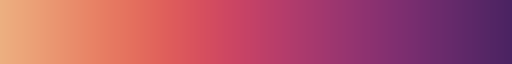

In [ ]:
palette1 = sns.color_palette("flare", as_cmap=True)
palette1

## Data Understanding

___

In [ ]:
print(anime.info())
print("-------- anime ↑ --------- rating ↓ ---------")
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
-------- anime ↑ --------- rating ↓ ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [ ]:
print(anime.describe())
print("-------- anime ↑ --------- rating ↓ ---------")
print(rating.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
-------- anime ↑ --------- rating ↓ ---------
            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [ ]:
anime.sample(5)

,anime_id,name,genre,type,episodes,rating,members
4840,11507,Kami nomi zo Shiru Sekai: Nonstop!! Hunters,Music,Music,1,6.62,6634
4800,8839,Gundam Neo Experience 0087: Green Divers,"Adventure, Mecha, Space",Movie,1,6.63,1849
11357,2417,Saigo no Door wo Shimero!,"Comedy, Drama, Romance, Yaoi",OVA,1,6.76,9076
1633,1419,Lupin III: Kutabare! Nostradamus,"Action, Adventure, Comedy, Shounen",Movie,1,7.48,4383
9704,24573,Neko to Nezumi,Comedy,Movie,1,5.57,72


In [ ]:
rating.sample(5)

,user_id,anime_id,rating
4409466,41607,2787,9
3315492,30565,16474,7
5648921,53029,53,8
3605930,33514,6610,9
5523690,51976,4070,10


In [ ]:
print(anime.head())
print("-------- anime ↑ --------- rating ↓ ---------")
print(rating.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
-------- anime ↑ --------- rating ↓ ---------
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1   

In [ ]:
print(anime.tail())
print("-------- anime ↑ --------- rating ↓ ---------")
print(rating.tail())

       anime_id                                               name   genre  \
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami  Hentai   
12290      5543                                        Under World  Hentai   
12291      5621                     Violence Gekiga David no Hoshi  Hentai   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...  Hentai   
12293     26081                   Yasuji no Pornorama: Yacchimae!!  Hentai   

        type episodes  rating  members  
12289    OVA        1    4.15      211  
12290    OVA        1    4.28      183  
12291    OVA        4    4.88      219  
12292    OVA        1    4.98      175  
12293  Movie        1    5.46      142  
-------- anime ↑ --------- rating ↓ ---------
         user_id  anime_id  rating
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9


### Data Cleaning

#### Missing value

In [ ]:
# melihat persentase persebaran missing value
anime_total = anime.isnull().sum().sort_values(ascending = False)
anime_percent = (anime.isnull().sum() / anime.isnull().count()).sort_values(ascending = False)
missing_anime = pd.concat([anime_total, anime_percent], axis = 1, keys = ['Total','percent'])
print(missing_anime)
print("-------- anime ↑ --------- rating ↓ ---------")
rating_total = rating.isnull().sum().sort_values(ascending = False)
rating_percent = (rating.isnull().sum() / rating.isnull().count()).sort_values(ascending = False)
missing_rating = pd.concat([rating_total, rating_percent], axis = 1, keys = ['Total','percent'])
print(missing_rating)

          Total   percent
rating      230  0.018708
genre        62  0.005043
type         25  0.002034
name          0  0.000000
anime_id      0  0.000000
episodes      0  0.000000
members       0  0.000000
-------- anime ↑ --------- rating ↓ ---------
          Total  percent
user_id       0      0.0
anime_id      0      0.0
rating        0      0.0


Dari hasil yang dikeluarkan, diketahui bahwa missing value atau NaN hanya dimiliki oleh tiga variabel pada dataset anime saja, yakni rating, genre dan type. Oleh karena itu, ketiga variabel tersebut akan dilihat bagaimana persebaran nilai nan-nya.

In [ ]:
# melihat persebaran nilai nan pada variabel yang memiliki nan
nan_variabel = anime[['rating','genre','type']]
nan_variabel.head(20)

,rating,genre,type
0,9.37,"Drama, Romance, School, Supernatural",Movie
1,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,9.25,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9.17,"Sci-Fi, Thriller",TV
4,9.16,"Action, Comedy, Historical, Parody, Samurai, S...",TV
5,9.15,"Comedy, Drama, School, Shounen, Sports",TV
6,9.13,"Action, Adventure, Shounen, Super Power",TV
7,9.11,"Drama, Military, Sci-Fi, Space",OVA
8,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Movie
9,9.11,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [ ]:
nan_variabel.tail(20)

,rating,genre,type
12274,NaN,Hentai,OVA
12275,3.14,Hentai,OVA
12276,4.00,Hentai,OVA
12277,4.66,"Comedy, Hentai",OVA
12278,3.61,"Hentai, Slice of Life",OVA
12279,NaN,Hentai,OVA
12280,NaN,Hentai,OVA
12281,4.53,Hentai,OVA
12282,NaN,Hentai,OVA
12283,4.95,Hentai,OVA


In [ ]:
nan_variabel.sample(20)

,rating,genre,type
636,7.93,"Horror, Mystery, Supernatural, Vampire",Special
8669,6.80,"Adventure, Drama, Sci-Fi, Space",Movie
10281,6.83,"Drama, Historical, Kids",OVA
6372,6.15,"Adventure, Fantasy, Kids",TV
3509,6.97,"Action, Drama, Mecha, Military, Sci-Fi",OVA
7907,4.70,Dementia,Movie
4475,6.72,"Action, Drama, Mecha, Military, Sci-Fi, Space",Movie
5913,6.32,Comedy,Special
5485,6.44,"Comedy, Ecchi, Romance, School, Slice of Life",TV
10456,8.33,"Drama, Kids",OVA


Pada 20 baris pertama dan terakhir serta 20 sample acak, nilai nan memiliki jumlah yang sedikit daripada data lainnya. Hal ini berkenaan dengan persentase yang dilakukan sebelumnya. Bahwa jumlah nilai yang tidak mencapai 1%, itu menandakan bahwa jumlah nan terhadap keseluruhan data tidak begitu signifikan atau memiliki pengaruh terhadap data. Namun, penyebab nilai nan penting untuk diketahui; apakah tidak terekam atau memang tidak ada?

Analisis:
1. Dari sample yang dilihat pada persebaran variabel nan, variabel rating adalah yang memiliki kemunculan nan terbanyak. Akan tetapi, pada baris disamping nilai nan tersebut terisi sebagaimana mestinya.
2. Tidak ditemukan nilai nan pada variabel lain, karena itu mungkin diperlukan sample data lain untuk melihat persebarannya.

In [ ]:
# menampilkan baris yang memiliki nilai nan
nan_rows = anime[anime.isnull().any(axis=1)]
nan_rows.head()

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607


Sesuai dengan persentase, ketiga variabel tersebut masing-masing memiliki nilai nan. Penyebab variabel memiliki nilai nan pun diketahui, yakni data tidak terekam. Pada saat user mengisi survey, responden mungkin lupa atau tidak dapat/tahu mengisi pertanyaan tertentu, atau sistem pencatatan gagal mencatat data karena masalah teknis. Misalnya, pada index 7018, responden menjawab semuanya dengan benar, kecuali pada variabel genre.

In [ ]:
anime.loc[7018]

,7018
anime_id,33187
name,Katsudou Shashin
genre,NaN
type,Movie
episodes,1
rating,5.79
members,607


In [ ]:
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())
anime['genre'] = anime['genre'].fillna("Lainnya")
anime['type'] = anime['type'].fillna("Lainnya")

In [ ]:
anime.sample(5)

,anime_id,name,genre,type,episodes,rating,members
10955,33730,Chain Chronicle: Haecceitas no Hikari Part 3,"Action, Adventure, Fantasy, Magic, Shounen",Movie,1,6.473902,1861
10715,33916,Wanwanwan Coin,Comedy,ONA,15,4.560000,37
2600,1312,Chikyuu Bouei Kigyou Dai-Guard,"Adventure, Comedy, Mecha, Military, Sci-Fi",TV,26,7.210000,4838
2679,6909,Jungle Taitei: Yuuki ga Mirai wo Kaeru,Adventure,Special,1,7.190000,1163
3505,6031,Osu!! Karate Bu,"Martial Arts, School, Shounen",OVA,4,6.970000,628


In [ ]:
# mengecek nilai nan
anime.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


### Duplicated Data

In [ ]:
print(anime[anime.duplicated()].any())
print(rating[rating.duplicated()].any())

anime_id    False
name        False
genre       False
type        False
episodes    False
rating      False
members     False
dtype: bool
user_id     True
anime_id    True
rating      True
dtype: bool


In [ ]:
rating.shape

(7813737, 3)

Diketahui bahwa pada dataset anime tidak ada data duplicat. Sebaliknya, pada dataset rating semua variabelnya ada duplicated.

In [ ]:
rating.duplicated().sum()

1

In [ ]:
rating[rating.duplicated(keep=False)]

,user_id,anime_id,rating
4499258,42653,16498,8
4499316,42653,16498,8


In [ ]:
rating.drop_duplicates(keep="first", inplace=True)
rating.shape

(7813736, 3)

In [ ]:
# gabungan dari dataset anime dan dataset rating
data = pd.merge(anime, rating, on='anime_id', suffixes= ['', '_user'])
data = pd.DataFrame(data)

In [ ]:
# menyimpan fulldata sebagai file csv
data.to_csv('/content/drive/MyDrive/Final Project Bootcamp/Dataset/Case03_Machine_Learning/data.csv', index=False)

In [ ]:
# read data
data = pd.read_csv('/content/drive/MyDrive/Final Project Bootcamp/Dataset/Case03_Machine_Learning/data.csv')

In [ ]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
rating_user,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813721,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813724,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


### numerical dan kategorical variabel

In [ ]:
# memisahkan data numerik dan kategorikal
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

In [ ]:
print(f"Categorical {categorical_data.columns}")
print("-------- Categorical ↑ --------- numerical ↓ ---------")
print(f"Numerical {numerical_data.columns}")

Categorical Index(['name', 'genre', 'type', 'episodes'], dtype='object')
-------- Categorical ↑ --------- numerical ↓ ---------
Numerical Index(['anime_id', 'rating', 'members', 'user_id', 'rating_user'], dtype='object')


### Analisis Variabel Categorical

#### Type

In [ ]:
categorical_data.sample()

,name,genre,type,episodes
2749668,Pandora Hearts,"Adventure, Fantasy, Mystery, Shounen, Supernat...",TV,25


------------(*)------------
Distribution of type
------------(*)------------
Mean: 1116246.5714285714
Median: 559366.0
Standard Deviation: 1882532.4623408983
type
TV         5283595
Movie      1051998
OVA         800307
Special     559366
ONA          91956
Music        26500
Lainnya          4
Name: count, dtype: int64


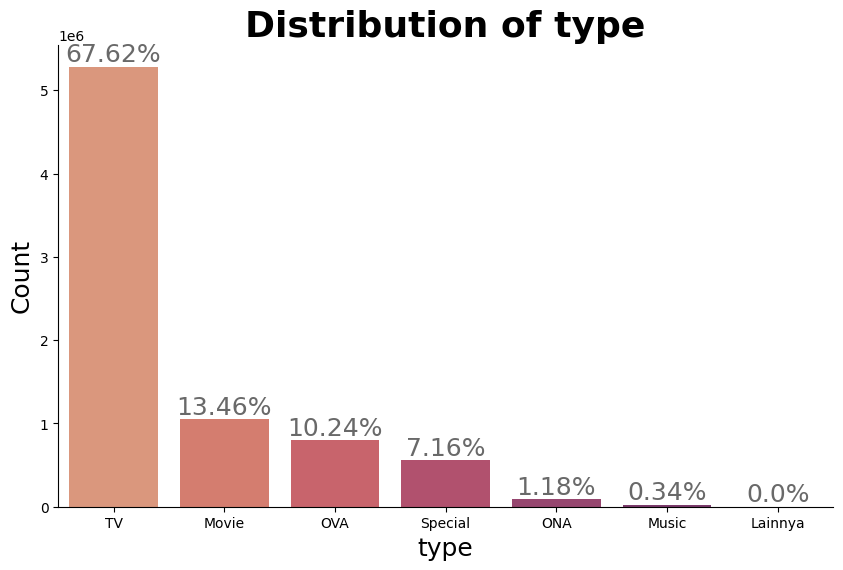

In [ ]:
# Mendefinisikan variabel
a = "type"
counts = data[a].value_counts()  # Menghitung frekuensi setiap kategori

# Menghitung persentase distribusi
y = round(counts / counts.sum() * 100, 2)  # Menghitung persentase dari total

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, palette='flare')
plt.title(f"Distribution of {a}", fontsize=26, fontweight='bold')  # Judul
plt.xlabel(f"{a}", fontsize=18)
plt.ylabel("Count", fontsize=18)

# Menyembunyikan beberapa garis tepi pada plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menambahkan persentase pada masing-masing bar
for i, (value, percent) in enumerate(zip(counts.values, y)):
    plt.text(i, value, f'{percent}%', ha='center', va='bottom', fontsize=18, color='#696969')

# Mencetak statistik distribusi
print("------------(*)------------")
print(f"Distribution of {a}")
print("------------(*)------------")
print(f"Mean: {counts.mean()}")  # Mean frekuensi
print(f"Median: {counts.median()}")  # Median frekuensi
print(f"Standard Deviation: {counts.std()}")  # SD frekuensi
print(counts)
plt.show()

___

------------(*)------------
Distribution of type (transformed)
------------(*)------------
Mean: 11.342440745711647
Median: 13.23456106623301
Standard Deviation: 4.622633198444592
type
TV         15.480117
Movie      13.866203
OVA        13.592752
Special    13.234561
ONA        11.429076
Music      10.184938
Lainnya     1.609438
Name: count, dtype: float64


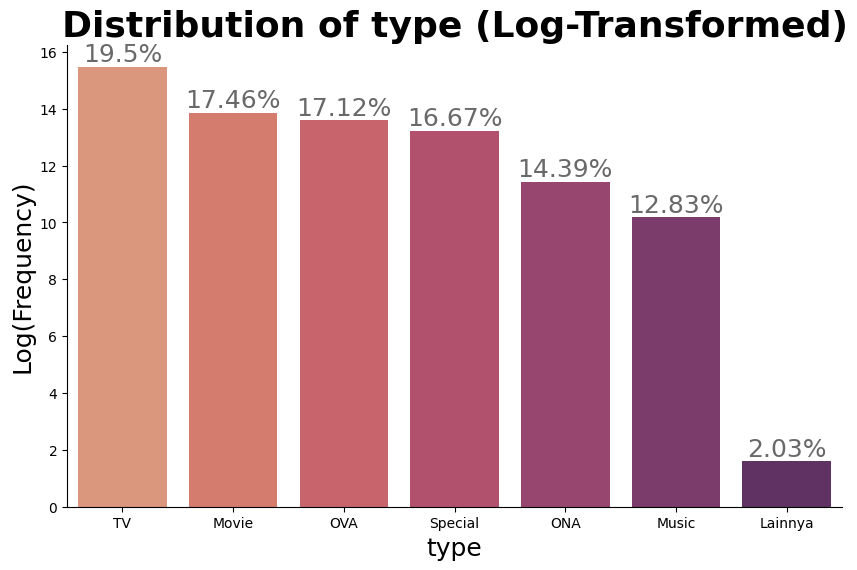

In [ ]:
# Mendefinisikan variabel
a = "type"
counts = data['type'].value_counts()

# Menghitung log transformasi dari frekuensi
log_counts = np.log1p(counts)  # Menggunakan log1p untuk menghindari log(0)

# Menghitung persentase distribusi
y = round(log_counts / log_counts.sum() * 100, 2)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=log_counts.index, y=log_counts.values, palette='flare')
plt.title(f"Distribution of {a} (Log-Transformed)", fontsize=26, fontweight='bold')  # Judul
plt.xlabel(f"{a}", fontsize=18)
plt.ylabel("Log(Frequency)", fontsize=18)
# Menyembunyikan beberapa garis tepi pada plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menambahkan persentase pada masing-masing bar
for i, (value, percent) in enumerate(zip(log_counts.values, y)):
    plt.text(i, value, f'{percent}%', ha='center', va='bottom', fontsize=18, color='#696969')

print("------------(*)------------")
print(f"Distribution of {a} (transformed)")
print("------------(*)------------")
print(f"Mean: {log_counts.mean()}")
print(f"Median: {log_counts.median()}")
print(f"Standard Deviation: {log_counts.std()}")
print(log_counts)
plt.show()

Dari grafik di atas, diketahui bahwa:
1. Anime yang memiliki type (tayang/dalam format penayangan) TV adalah yang paling banyak digemari oleh penggemar. Di sisi lain, persentase OVA juga tidak kalah tingginya. Dengan total keduanya yang dapat mencapai setengah dari dataset, ini menandakan adanya preferensi penggemar secara signifikan, serta adanya nilai ekstrim dalam data.
2. Anime berformat Movie hingga Special memiliki jarak yang cukup jauh dari dua variabel sebelumnya, akan tetapi, baik Movie maupun Special keduanya sama-sama mendekati nilai rata-rata, yang mana menunjukkan bahwa secara keseluruhan

#### Name

##### Top 10 Anime

###### Top 10 anime dengan jumlah anggota terbanyak/komunitas/fandom (name and members)

In [ ]:
def visualize_top_anime(data, title=None, x_col='rating_user', y_col='name', top_n=10):
    # Mengambil n anime teratas
    top_data = data.head(top_n)

    # Kalau lupa memberikan judul plot
    if not title:
        title = f"Top {top_n} Anime by {x_col}"

    # Visualisasi
    plt.figure(figsize=(10, 6))  # Ukuran figur yang wajar
    palette1 = sns.color_palette("flare", n_colors=len(top_data))
    plt.barh(top_data[y_col], top_data[x_col], height=0.7, color=palette1)
    plt.title(title, fontsize=22, fontweight='bold')
    plt.xlabel(x_col.replace('_', ' ').title(), fontsize=16)
    plt.ylabel(y_col.title(), fontsize=16)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Menambahkan nilai di samping bar
    for index, value in enumerate(top_data[x_col]):
        plt.text(value + 50, index, int(value), va='center', fontsize=12, color='#696969')

    plt.show()

In [ ]:
def visualize_top_anime(data, title=None, x_col='rating_user', y_col='name', top_n=10):
    # Mengambil n anime teratas
    top_data = data.head(top_n)

    # Jika judul plot tidak diberikan, set judul default
    if not title:
        title = f"Top {top_n} Anime by {x_col}"

    # Visualisasi
    plt.figure(figsize=(10, 6))  # Ukuran figur yang wajar
    palette1 = sns.color_palette("flare", n_colors=len(top_data))

    # Membuat bar horizontal
    plt.barh(top_data[y_col], top_data[x_col], height=0.7, color=palette1)

    # Menambahkan judul dan label sumbu
    plt.title(title, fontsize=22, fontweight='bold')
    plt.xlabel(x_col.replace('_', ' ').title(), fontsize=16)
    plt.ylabel(y_col.title(), fontsize=16)

    # Menghilangkan spines atas dan kanan
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Menambahkan nilai di samping bar
    for index, value in enumerate(top_data[x_col]):
        plt.text(value + 0.1, index, f'{value:.2f}', va='center', fontsize=12, color='#696969')  # Format desimal

    plt.show()


In [ ]:
top_com = data.groupby('name')['members'].sum().sort_values(ascending = False).reset_index().head(10)
top_com

,name,members
0,Death Note,39887494780
1,Sword Art Online,27313677300
2,Shingeki no Kyojin,26513142507
3,Code Geass: Hangyaku no Lelouch,19822555418
4,Angel Beats!,19511848668
5,Fullmetal Alchemist: Brotherhood,19503523710
6,Naruto,17714474725
7,Elfen Lied,17150293566
8,Toradora!,15390978211
9,Fullmetal Alchemist,15028812288


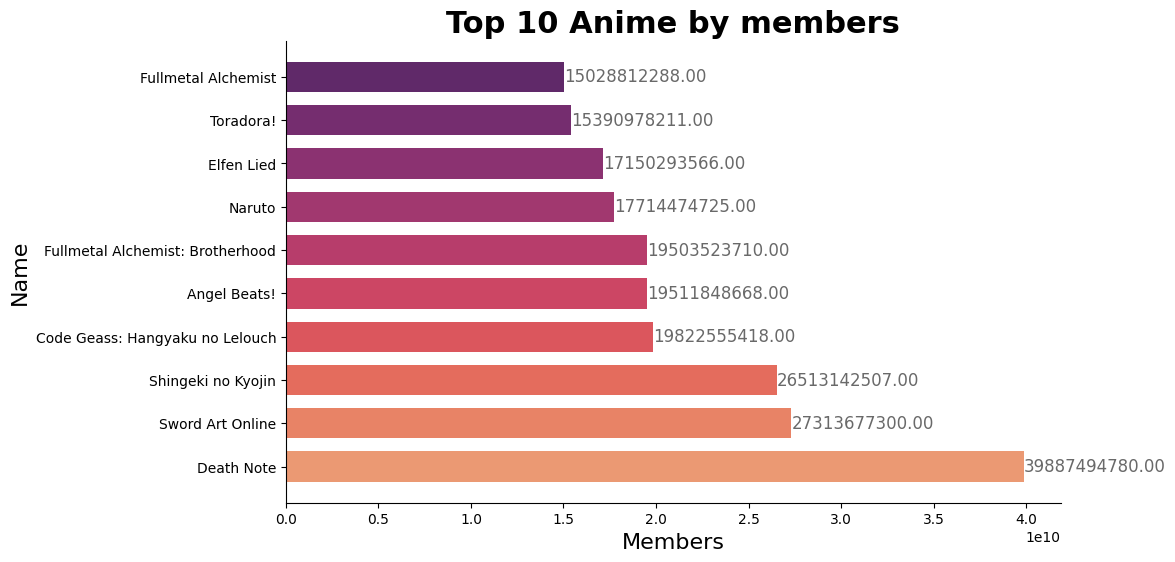

In [ ]:
visualize_top_anime(top_com, None, 'members', 'name')

1. Dari data yang ditampilkan, dapat dikatakan bahwa Death Note adalah anime dengan komunitas terbanyak di antara dataset (variabel name; anime lainnya). Yang dapat menggambarkan bahwa anime tersebut memiliki basis fandom yang cukup besar di antara anime lainnya.
2. Terdapat jarak yang cukup besar antara anime Death Note dengan Sword Art Online, yakni komunitas anime yang ada di urutan kedua. Menggambarkan bahwa Sword Art Online memiliki jarak yang signifikan dengan Death Note, namun memiliki jarak yang kecil dengan anime setelahnya. Yakni Shingeki No Kyujin. Hal ini mungkin saja dapat mengindikasikan adanya faktor atau variabel lain seperti genre atau type penayangan anime tersebut.
3. Kemudian, anime Shingeki no Kyujin memiliki jarah yang lumayan dekat dengan Code Geass: Hangyaku no Lelouch, dan Code Geass: Hangyaku no Lelouch memiliki sedikit perbedaan tingkat members dengan anime dan anime setelahnya. Dari hubungan Code Geass: Hangyaku no Lelouch dan anime-anime setelahnya, mengindikasikan adanya faktor-faktor lain yang memengaruhi tingkat kegemaran penggemar terhadap suatu anime— sehingga dapat dikatakan sebuah fandom.
4. Melihat sedikitnya perbedaan mulai dari anime Code Geass: Hangyaku no Lelouch hingga ke anime berikut dan berikutnya, terlihat adanya persaingan yang ketat antar members anime. Sebaliknya, tingginya members Death Note kembali menguatkan adanya gagasan bahwa genre (variabel lain) memiliki andil dalam perluasan komunitas.

###### Top 10 anime teratas berdasarkan jumlah penilaian pengguna (name and rating_user)

In [ ]:
top_user = data.groupby('name')['rating_user'].count().sort_values(ascending=False).reset_index().head(10)
top_user

,name,rating_user
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29583
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


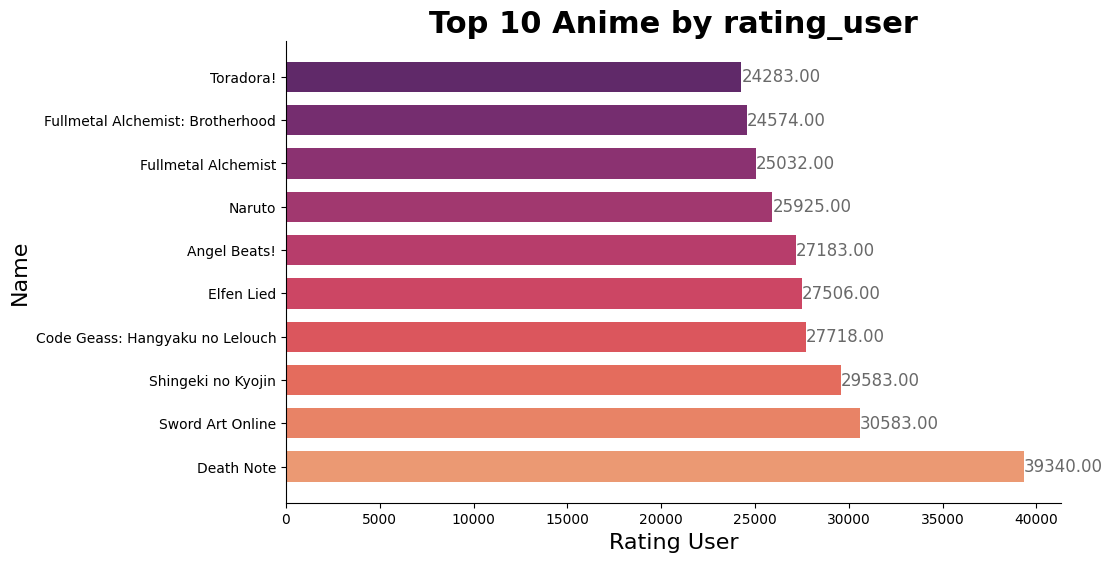

In [ ]:
visualize_top_anime(top_user, None, 'rating_user', 'name')

1. Tidak ada perbedaan yang cukup signifikan dengan persebaran members anime, namun jika diperhatikan dengan seksama, terdapat perbedaan urutan dan tingkat anime dengan data sebelumnya. Yakni, mulai dari index ke-3, anime-anime setelahnya memiliki persaingan rating_user yang cukup ketat.
2. Adanya perbedaan urutan dengan variabel tol_com mungkin saja dapat mengindikasikan adanya faktor-faktor lain seperti type, genre dan baik anime itu sendiri sehingga user memberikan penilaian/rating seperti itu.
3. Adapun, bertahannya Death Note, Sword Art Online, Shingeki no Kyujin dan Code Geass: Hangyaku no Lelouch kembali menguatkan adanya implikasi bahwa variabel lain memiliki andil dalam tingkat anime tersebut; apa yang membuat anime tersebut menjadi istimewa di mata penonton?

###### Top 10 anime dengan jumlah total rating tertinggi (name and rating)

In [ ]:
top_rate = data.groupby('name')['rating'].max().sort_values(ascending = False).reset_index().head(10)
top_rate

,name,rating
0,Mogura no Motoro,9.50
1,Kimi no Na wa.,9.37
2,Fullmetal Alchemist: Brotherhood,9.26
3,Yakusoku: Africa Mizu to Midori,9.25
4,Gintama°,9.25
5,Steins;Gate,9.17
6,Gintama&#039;,9.16
7,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
8,Hunter x Hunter (2011),9.13
9,Gintama&#039;: Enchousen,9.11


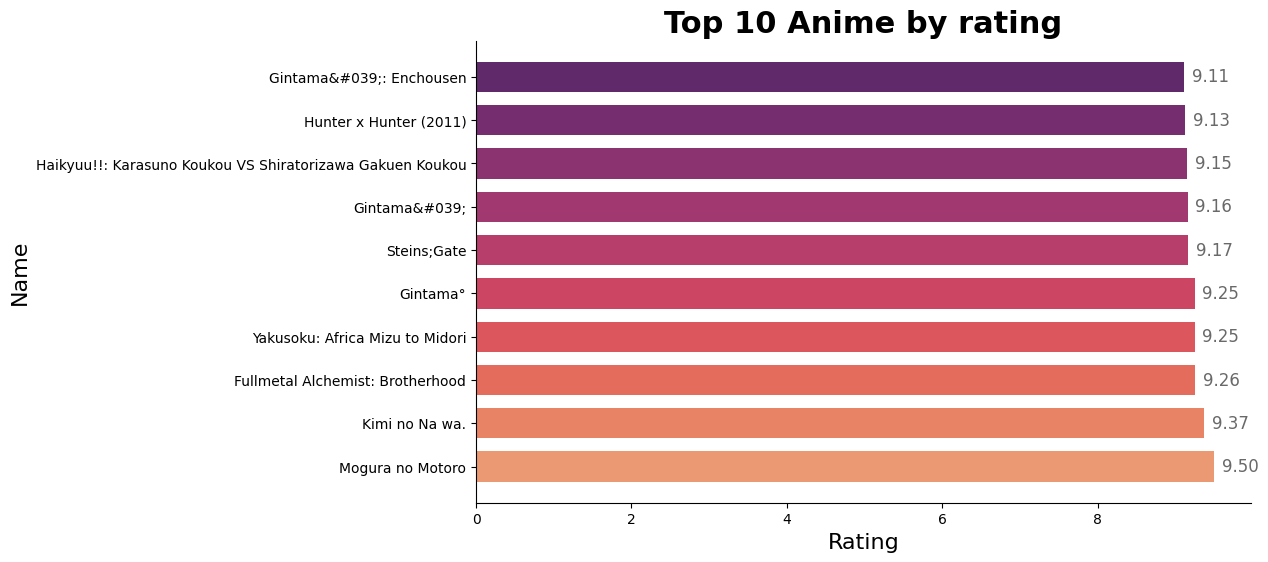

In [ ]:
visualize_top_anime(top_rate, None, 'rating', 'name')

#### Episodes

In [ ]:
top_eps_highest_rating = data.groupby('episodes')['rating'].max().reset_index()
top_eps_highest_rating = top_eps_highest_rating.sort_values(by='rating', ascending=False).head(10)
top_eps_highest_rating

,episodes,rating
162,1,9.50
0,1,9.37
62,64,9.26
50,51,9.25
23,24,9.17
9,10,9.15
116,148,9.13
98,110,9.11
12,13,9.11
137,201,9.04


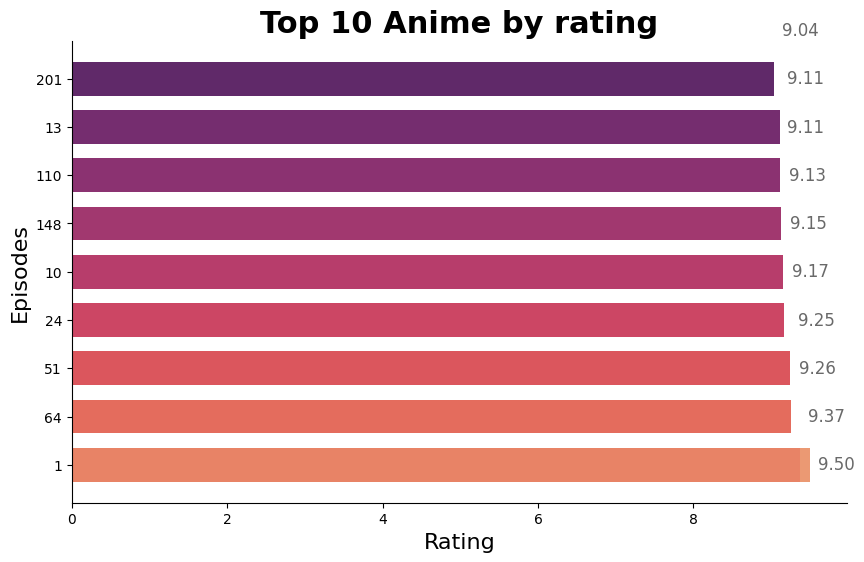

In [ ]:
# Pastikan kolom episodes adalah string
top_eps_highest_rating['episodes'] = top_eps_highest_rating['episodes'].astype(str)

# Panggil fungsi visualisasi
visualize_top_anime(top_eps_highest_rating, None, 'rating', 'episodes')


In [ ]:
visualize_top_anime(top_eps_highest_rating, None, 'rating', 'episodes')

NameError: name 'visualize_top_anime' is not defined

In [ ]:
# Memfilter baris yang memiliki judul 'Death Note'
data[data['name'] == "Death Note"]

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
344257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3,10


In [ ]:
data[data['name'] == "Noragami"]

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
1810382,20507,Noragami,"Action, Adventure, Shounen, Supernatural",TV,12,8.17,515378,3,8


In [ ]:
data[data['episodes'] == 1]

,Unnamed: 0,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...,...
7813722,7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


1. Anime dengan episode tunggal seperti movies atau OVA (Original Video Animation) sering kali memiliki produksi yang lebih padat dan intensif, karena harus menceritakan keseluruhan cerita dalam waktu yang terbatas. Rating tinggi pada anime dengan 1 episode, misalnya, bisa jadi menunjukkan karya yang sangat berkesan atau berkualitas, seperti film anime yang populer.
2. Sebaliknya, anime seasons-an dengan banyak episode seperti TV anime atau anime yang terbagi dalam beberapa musim (seasons), seperti Death Note atau Naruto, mungkin mendapatkan rating tinggi karena alur cerita yang berkembang dan keterlibatan penonton yang berkelanjutan. Penonton memiliki kesempatan untuk benar-benar terikat dengan karakter dan plot, yang dapat meningkatkan rating keseluruhan.
3. Akan tetapi, itu semua tidak dapat dijadikan patokan dan dapat memperkuat indikasi bahwa banyak faktor yang memengaruhi keadaan/status suatu anime.

#### Genre

In [ ]:
data=data.copy()
data.drop_duplicates(subset ="name",
                     keep = 'first', inplace = True)

In [ ]:
anime.info()

In [ ]:
data['genre'].value_counts().sort_values(ascending=False).head(20)

,count
genre,
Hentai,781
Comedy,444
Music,285
Kids,171
"Comedy, Slice of Life",150
"Fantasy, Kids",108
Dementia,105
Fantasy,100
"Comedy, Kids",90


In [ ]:
df_g = data
df_g['genres'] = df_g['genre'].str.split(', ')
df_g

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,genres
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,"[Drama, Romance, School, Supernatural]"
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,"[Drama, Romance, School, Supernatural]"
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,"[Drama, Romance, School, Supernatural]"
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,"[Drama, Romance, School, Supernatural]"
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,"[Drama, Romance, School, Supernatural]"
...,...,...,...,...,...,...,...,...,...,...
7813721,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1,[Hentai]
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1,[Hentai]
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4,[Hentai]
7813724,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1,[Hentai]


In [ ]:
genre_split = df_g.explode('genres')
genre_split

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,genres
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,Drama
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,Romance
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,School
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,Supernatural
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,Drama
...,...,...,...,...,...,...,...,...,...,...
7813721,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1,Hentai
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1,Hentai
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4,Hentai
7813724,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1,Hentai


In [ ]:
top_genre = genre_split.groupby('genres')['rating'].mean().sort_values(ascending=False).reset_index()
top_genre

,genres,rating
0,Thriller,8.236668
1,Police,8.041577
2,Josei,7.977242
3,Psychological,7.974920
4,Samurai,7.967004
5,Military,7.958470
6,Historical,7.926909
7,Dementia,7.919689
8,Cars,7.917395
9,Mystery,7.893486


In [ ]:
t_genre = top_genre.head(10)
t_genre

,genres,rating
0,Thriller,8.236668
1,Police,8.041577
2,Josei,7.977242
3,Psychological,7.974920
4,Samurai,7.967004
5,Military,7.958470
6,Historical,7.926909
7,Dementia,7.919689
8,Cars,7.917395
9,Mystery,7.893486


### **Analisis**

- Hasil distribusi menunjukkan dominasi genre dengan kategori "berat," dengan Thriller sebagai genre tertinggi (8.24), diikuti oleh Police (8.04) dan Josei (7.98). Hal ini mengindikasikan adanya preferensi dari penonton, yang kemungkinan dipengaruhi oleh faktor usia dan minat pribadi terhadap cerita yang kompleks dan emosional. Sepuluh genre dengan rating tertinggi mengindikasikan bahwa penonton lebih menyukai anime yang memberikan kesan mendalam dan mengundang pemikiran (teori fandom) serta emosional.

- Dekatnya jarak antar rating genre menunjukkan persaingan yang ketat di industri anime. Kompleksitas dan keragaman tema menggambarkan persebaran anime dengan alur cerita yang seimbang dan ketat, serta tema-tema yang menyentuh isu-isu berat.

### **Rumusan Masalah**

1. Bagaimana distribusi rating pada 10 genre anime dengan rating tertinggi?
2. Genre apa yang memiliki rata-rata rating tertinggi, dan apa yang dapat disimpulkan dari preferensi tersebut?
3. Apakah ada pola atau karakteristik dalam genre dengan rating tinggi yang dapat dijadikan panduan dalam produksi konten baru?

### **Insight**

- Secara umum, penonton cenderung menyukai anime dengan alur cerita yang berbeda dari biasanya, seperti:
  1. Tema dengan ketegangan tinggi dan penuh kejutan.
  2. Cerita yang mengandung elemen psikologis dan emosi mendalam.
  3. Alur yang mengandung nilai budaya atau sejarah yang kuat.

- Dengan adanya preferensi penonton pada genre dengan tema berat, mengarahkan strategi produksi atau pemasaran agar lebih sesuai dengan minat penonton dapat meningkatkan peluang keberhasilan anime di genre-genre populer ini.

* Genre dengan rating tertinggi ialah josei dan thriller di mana 6 variabel di bawahnya adalah genre anime yang memiliki kategori berat. Hal ini mungkin saja dapat mengindikasikan bahwa banyaknya rating terhadap genre-genre tsb, sebenarnya mempresentasikan preferensi user dalam memilih tontonan anime (seperti usia, jenis kelamin dan dominasi dalam industri anime)
* Kemudian genre dengan kategori santai hingga fantastica-isekai mengisi pertengahan data mulai dari genre ke 9. Hingga genre dengan kategori khusus yang mengisi sisanya.
___

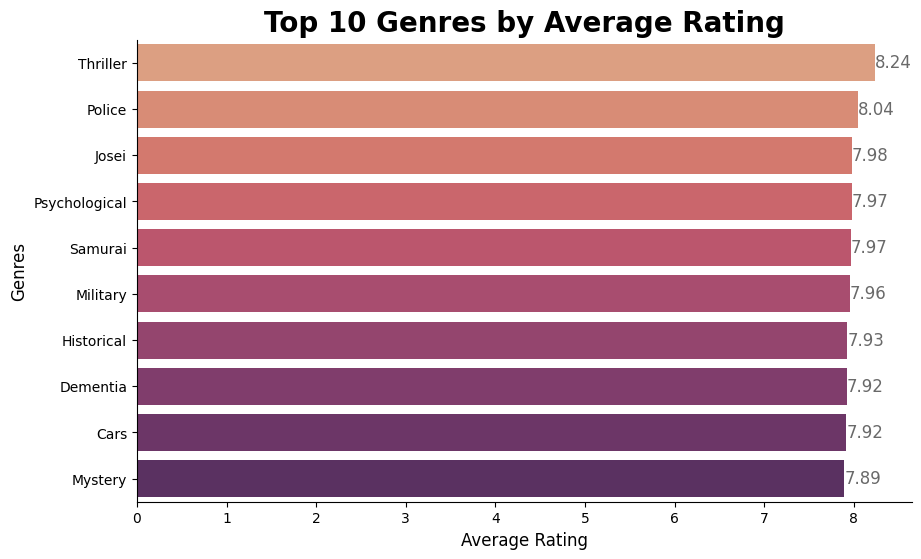

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='genres', data=t_genre, palette='flare')

# Beri judul dan label pada plot
plt.title('Top 10 Genres by Average Rating', fontsize=20, fontweight='bold')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Menyembunyikan beberapa garis tepi pada plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Menambahkan label nilai pada setiap bar
for index, value in enumerate(t_genre['rating']):
    plt.text(value, index, f'{round(value, 2)}', ha='left', va='center', fontsize=12, color='#696969')

# Tampilkan visualisasi
plt.show()


In [ ]:

'''
# Mendefinisikan variabel
a = "genre"
x =  t_genre.value_counts().sort_values(ascending=True)# Menghitung dan mengurutkan value_counts
y = round(x / x.sum() * 100, 2)  # Menghitung persentase

# visualisasi
plt.figure(figsize=(10, 6))
palette1 = sns.color_palette("flare", n_colors=len(x))  # Membuat palet warna sesuai jumlah kategor
plt.barh(x.index, x.values, height=0.9 ,color=palette1)  # Menggunakan palet warna
plt.title(f"Distribution of {a}", fontsize=26, fontweight='bold')  # Judul {a} variabel", fo)
plt.ylabel(a, fontsize=18)
plt.xlabel(f"count", fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Menambahkan nilai dan persentase di samping bar
for index, percent in enumerate(y):
    plt.text(x.values[index] + 50, index, f'{percent}%', va='center', fontsize=14, color='#696969')

plt.show()
'''

SyntaxError: incomplete input (<ipython-input-56-2f75b87c577d>, line 22)

### Analisis anime Variabel Numerical

In [ ]:
numerical_data.columns

Index(['anime_id', 'rating', 'members', 'user_id', 'rating_user'], dtype='object')

------------(*)------------
Distribution of anime_id
------------(*)------------
Mean: 8909.045304116717
Median: 6213.0
Standard Deviation: 8883.922998496519


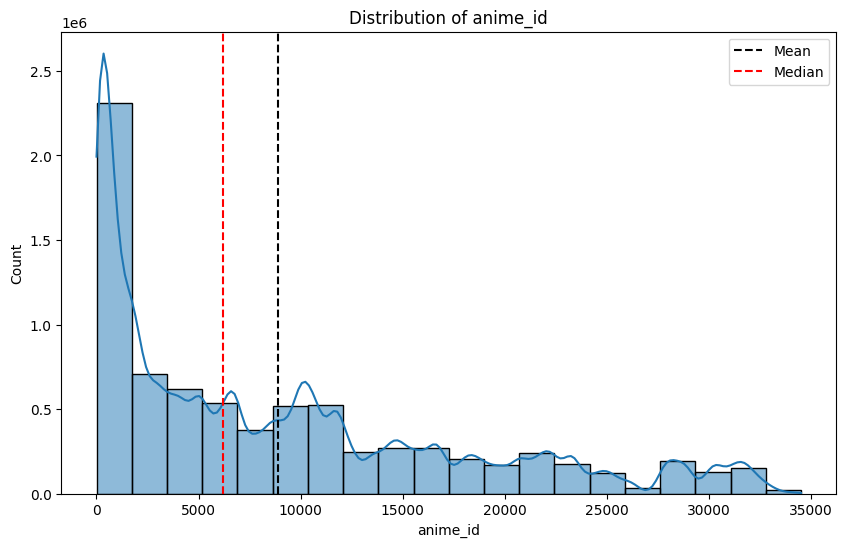

------------(*)------------
Distribution of rating
------------(*)------------
Mean: 7.653127073515941
Median: 7.68
Standard Deviation: 0.6730287091086956


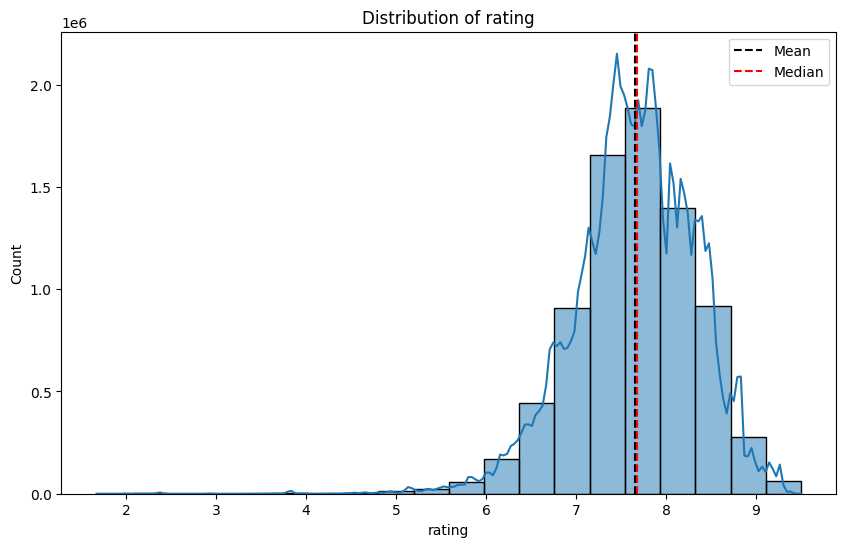

------------(*)------------
Distribution of members
------------(*)------------
Mean: 178620.8049811569
Median: 110470.0
Standard Deviation: 188176.41715109933


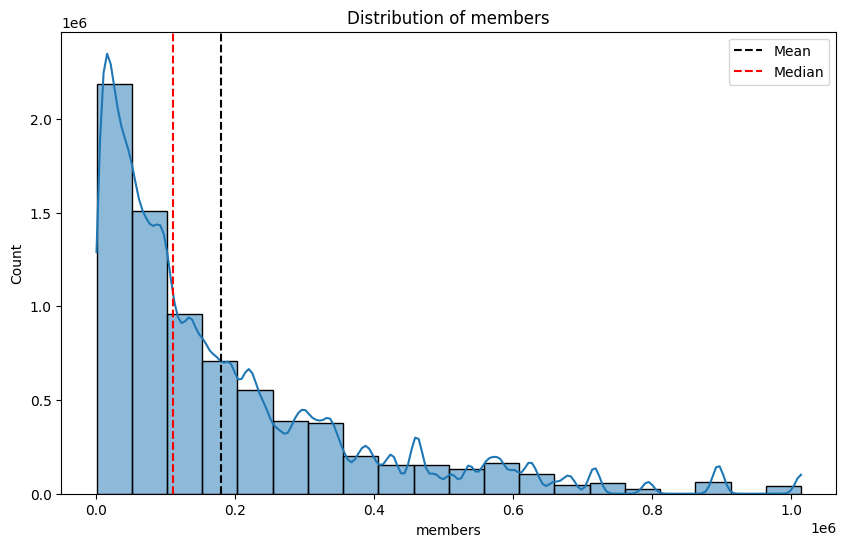

------------(*)------------
Distribution of user_id
------------(*)------------
Mean: 36727.95473722079
Median: 36791.0
Standard Deviation: 20997.95075865083


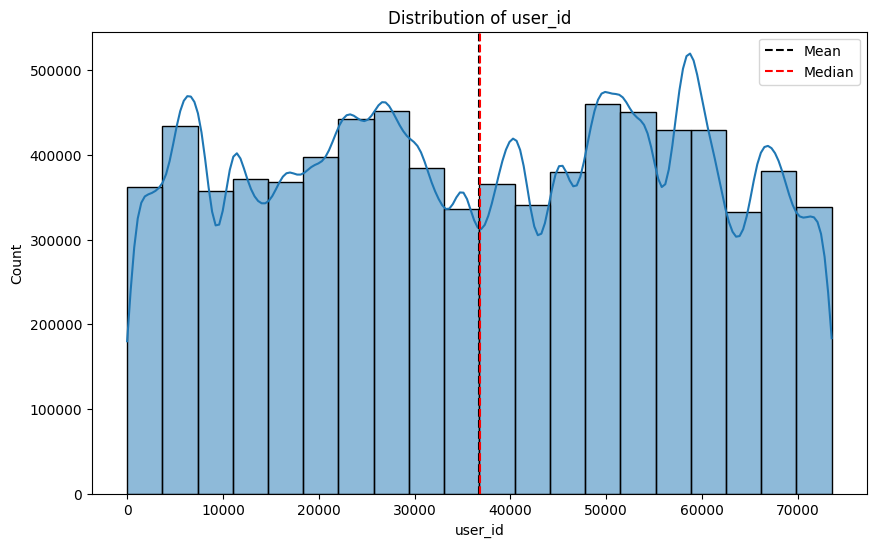

------------(*)------------
Distribution of rating_user
------------(*)------------
Mean: 6.144036130261526
Median: 7.0
Standard Deviation: 3.7277955168392314


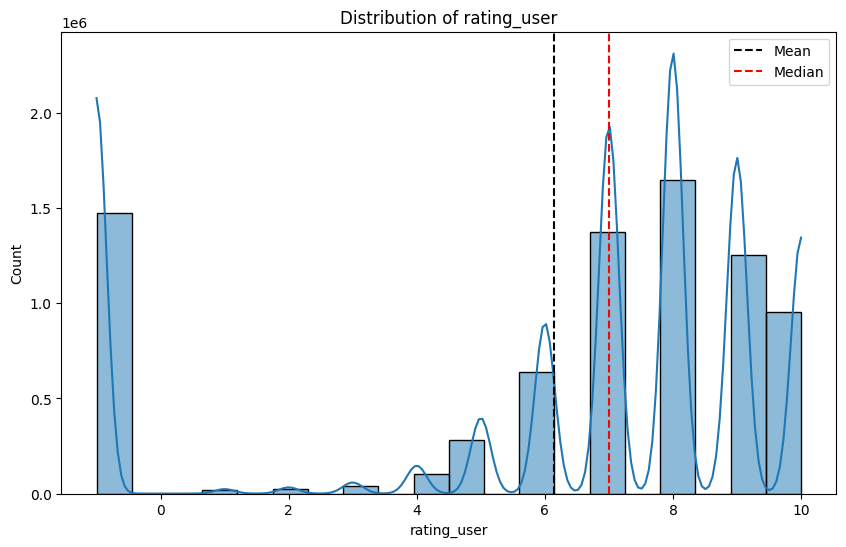

In [ ]:
columns_to_plot = ['anime_id', 'rating', 'members', 'user_id', 'rating_user']

# Loop untuk membuat visualisasi untuk setiap kolom
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(numerical_data[column], bins=20, kde=True, palette='flare')
    plt.title(f"Distribution of {column}")
    line1 = plt.axvline(numerical_data[column].mean(), color="k", linestyle="--", label="Mean")
    line2 = plt.axvline(numerical_data[column].median(), color="r", linestyle="--", label="Median")
    plt.legend(handles=[line1, line2], loc='upper right')

    # Menampilkan nilai mean, median, dan standar deviasi
    print("------------(*)------------")
    print(f"Distribution of {column}")
    print("------------(*)------------")
    print(f"Mean: {numerical_data[column].mean()}")
    print(f"Median: {numerical_data[column].median()}")
    print(f"Standard Deviation: {numerical_data[column].std()}")

    plt.show()  # Menampilkan grafik

### Hubungan antar variabel

In [ ]:
from scipy.stats import pearsonr

In [ ]:
data.sample()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user,genres
6156399,907,Princess Princess,"Comedy, School, Shoujo",TV,12,7.16,38778,46,7,"[Comedy, School, Shoujo]"


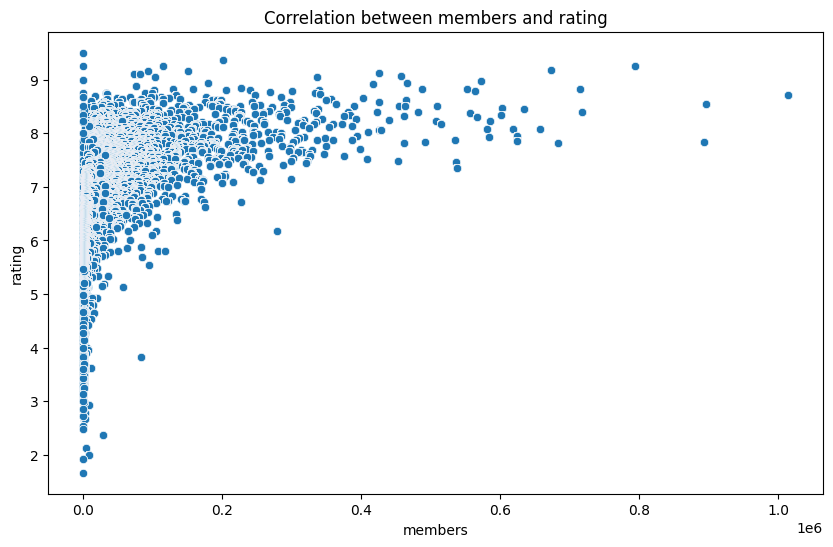

In [ ]:
# Mendefinisikan vaval
x = "members" # sumbu x
y = "rating" # sumbu y
dropnull = numerical_data[numerical_data[x] > 0]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dropnull, x=x, y=y)  # Menggunakan variabel x dan y untuk scatterplot
plt.title(f"Correlation between {x} and {y}")

# Menampilkan plot dan uji korelasi formal
correlation = pearsonr(dropnull[x], dropnull[y])

plt.show()

## Modeling

In [ ]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

data["name"] = data["name"].apply(text_cleaning)

In [ ]:
data_pivot=data.pivot_table(index='name',columns='user_id',values='rating_user').fillna(0)
data_pivot.head()

user_id,1,2,3,4,5,6,7,8,10,11,...,62710,62753,63076,64178,65175,65682,69497,70463,72404,72800
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-sen Hayato,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-sen Hayato Pilot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
# Konversi data_pivot menjadi sparse matrix
data_matrix = csr_matrix(data_pivot.values)

In [ ]:
data_matrix

<11191x1677 sparse matrix of type '<class 'numpy.float64'>'
	with 11193 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## Collaborative Filtering

### Item Based

In [ ]:
# pilih random anime
query_no = np.random.choice(data_pivot.shape[0])
print(f"Kami akan memberikan Anda rekomendasi anime, yakni untuk anime dengan id {query_no}: {data_pivot.index[query_no]}.")

Kami akan memberikan Anda rekomendasi anime, yakni untuk anime dengan id 9276: Sousei no Aquarion OVA.


In [ ]:
# Mencari tetangga terdekat menggunakan kkn
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no, :].values.reshape(1, -1), n_neighbors=10)
distances, indices

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[7254, 5345, 5490, 7256, 5342, 7260,  135,  606,  117, 7253]]))

In [ ]:
  Anime Rating
No
1 Kuroko no Basket: Saikou no Present Desu 8.340000
2 Last Exile: Ginyoku no Fam Recaps 6.560000
3 One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume! 7.430000
4 Kuroko no Basket: Mou Ikkai Yarimasen ka 7.860000
5 One Piece: Taose! Kaizoku Ganzack 6.870000
6 Afro Samurai Pilot 6.790000
7 Asobi ni Iku yo!: Asobi ni Oide - Owari 6.450000
8 Acchi Kocchi (TV): Place=Princess 7.620000
9 One Piece: Mamore! Saigo no Dai Butai 7.490000 frno = []
name = []
distance = []
rating = []
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendasi anime untuk penggemar {data_pivot.index[query_no]} adalah:\n")
    else:
        # print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)
dic = {"No" : no, "Anime" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style

Recommendasi anime untuk penggemar Sousei no Aquarion OVA adalah:



,Anime,Rating
No,,
1,Kuroko no Basket: Saikou no Present Desu,8.340000
2,Last Exile: Ginyoku no Fam Recaps,6.560000
3,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,7.430000
4,Kuroko no Basket: Mou Ikkai Yarimasen ka,7.860000
5,One Piece: Taose! Kaizoku Ganzack,6.870000
6,Afro Samurai Pilot,6.790000
7,Asobi ni Iku yo!: Asobi ni Oide - Owari,6.450000
8,Acchi Kocchi (TV): Place=Princess,7.620000
9,One Piece: Mamore! Saigo no Dai Butai,7.490000


### Content Based Filtering

In [ ]:
import psutil # checked memory
print(psutil.virtual_memory())

svmem(total=359233150976, available=350619934720, percent=2.4, used=6235152384, free=334253703168, active=1665757184, inactive=21368733696, buffers=608976896, cached=18135318528, shared=3850240, slab=1114136576)


In [ ]:
rec_data = data.copy()
rec_data.drop_duplicates(subset="name", keep="first", inplace=True)
rec_data.reset_index(drop=True, inplace=True)

# Membagi genre agar bisa diolah sebagai teks
genres = rec_data['genre'].str.split(", ").astype(str)

In [ ]:
# Membuat mapping dari nama anime ke indeks
rec_indices = pd.Series(df_g.index, index=df_g["name"]).drop_duplicates()

In [ ]:
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")

tfv_matrix = tfv.fit_transform(genres)

In [ ]:
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
rec_indices = pd.Series(rec_data.index, index=rec_data["name"]).drop_duplicates()

def rekomendasikan(judul, sig=sig):
    idx = rec_indices[judul]  # Mencari indeks anime berdasarkan judul

    # Menghitung kesamaan antara anime yang dipilih dan yang lainnya
    sig_score = list(enumerate(sig[idx]))

    # Mengurutkan berdasarkan nilai kesamaan
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)

    # Mengambil 10 rekomendasi teratas
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]

    # Membuat tabel rekomendasi
    rec_df = pd.DataFrame({
        "No": range(1, 11),
        "Anime Name": rec_data["name"].iloc[anime_indices].values,
        "Rating": rec_data["rating"].iloc[anime_indices].values
    })
    rec_df.set_index("No", inplace=True)

    return rec_df

In [ ]:
rekomendasikan("Noragami")

,Anime Name,Rating
No,,
1,Noragami,8.17
2,Bleach Movie 2: The DiamondDust Rebellion - Mo...,7.60
3,Yuu☆Yuu☆Hakusho: Eizou Hakusho,7.48
4,Tokyo Juushouden,5.67
5,Tokyo Juushouden: Fuuma Gogyou Denshou,5.58
6,Gensoumaden Saiyuuki Movie: Requiem - Erabarez...,7.48
7,Konjiki no Gash Bell!!: 101 Banme no Mamono,7.41
8,Gensoumaden Saiyuuki OVA,7.31
9,Konjiki no Gash Bell!!: Mecha Vulkan no Raishuu,7.24


In [ ]:
rekomendasikan("Naruto")

,Anime Name,Rating
No,,
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [ ]:
rekomendasikan("Doraemon")

,Anime Name,Rating
No,,
1,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.54
2,Doraemon,7.49
3,Doraemon Movie 33: Nobita no Himitsu Dougu Museum,7.47
4,Doraemon Movie 07: Nobita to Tetsujin Heidan,7.46
5,Doraemon Movie 12: Nobita no Dorabian Nights,7.37
6,Doraemon Movie 30: Nobita no Ningyo Daikaisen,7.34
7,Doraemon Movie 32: Nobita to Kiseki no Shima -...,7.34
8,Doraemon Movie 10: Nobita no Nippon Tanjou,7.33
9,Doraemon Movie 23: Nobita to Robot Kingdom,7.33


## Github Push [**Documentation**]

___
Temukan di sini: [**Github Repository.**](https://github.com/Lanlanb/Final-Projects-Kelas.work/blob/79ec3b6a30f5c038e906d301f9fc4afcb3ee9326/Case03_Machine_Learning)